In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Import PCB.csv from the DataSciML folder in google drive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/DataSciML/PCB.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df

,X,Y,R,G,B,Grey
0,105,0,0.909804,0.976471,0.937255,0
1,106,0,0.792157,0.901961,0.843137,0
2,107,0,0.631373,0.788235,0.694118,0
3,108,0,0.474510,0.670588,0.556863,0
4,109,0,0.341176,0.584314,0.439216,0
...,...,...,...,...,...,...
723547,961,778,0.745098,0.917647,0.811765,0
723548,962,778,0.749020,0.917647,0.811765,0
723549,963,778,0.752941,0.909804,0.807843,0
723550,964,778,0.756863,0.905882,0.807843,0


In [4]:
# Step 2: Seperate Features and Labels
X = df.drop('Grey', axis=1)
y = df['Grey']

In [5]:
# Step 3: Scale the features
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [6]:
# Step 4: Apply the PCA
# Setting n_components to retain 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [7]:
# Display explained variance to confirm reduction
print("Explained vairance by selected components:", pca.explained_variance_ratio_)
print("Total number of components selected:", pca.n_components_)

Explained vairance by selected components: [0.55181521 0.20001815 0.19915814]
Total number of components selected: 3


In [8]:
# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y,test_size=0.3, random_state=42)

In [9]:
# Step 6: Apply KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
# Step 7: Evaluate the model
accuracy = knn.score(X_test, y_test)
print("KNN Accuracy with PCA-reduced data:", accuracy)

KNN Accuracy with PCA-reduced data: 0.9936378797232178


In [11]:
print("KNN classification report with PCA-reduced ata:", classification_report(y_test, knn.predict(X_test)))

KNN classification report with PCA-reduced ata:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213439
           1       0.83      0.78      0.80      3627

    accuracy                           0.99    217066
   macro avg       0.91      0.89      0.90    217066
weighted avg       0.99      0.99      0.99    217066



# Heatmaps for Clustering

<Axes: >

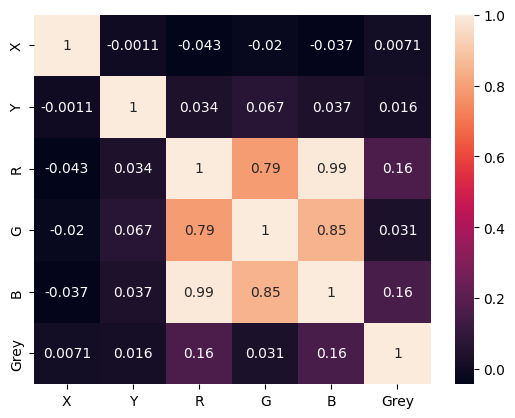

In [12]:
sns.heatmap(df.corr(), annot=True)

Text(0.5, 1.0, 'Predicted vs Actual Color (Grey) of the test-pad of the Flyling Probe Tester')

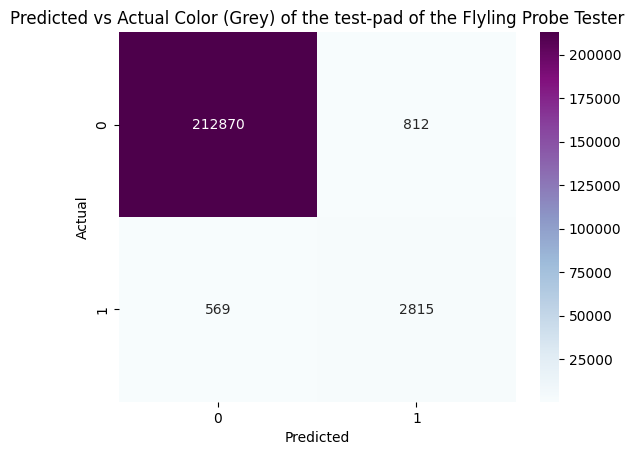

In [13]:
# Plot the KNN model accuracy on a confusion matrix heatmap
pred = knn.predict(X_test)


cm = confusion_matrix(pred, y_test)

# fmt='g' tells Python to use the 'general' format for representing numbers
sns.heatmap(cm, annot=True, fmt='g', cmap='BuPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual Color (Grey) of the test-pad of the Flyling Probe Tester')